In [1]:
import numpy as np
import scipy.stats as stats
from tqdm import tqdm as tqdm
import random
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1.  Что мы прошли на первом занятии? 
## 1.1 t-статистика для разницы средних

$$H_0:\bar X_t -  \bar X_c = 0$$
$$H_1:\bar X_t -  \bar X_c\neq 0$$

1. По ЦПТ 

$\bar X_t \xrightarrow{d} \mathcal{N}(\mu_t, \dfrac{\sigma_t^2}{n})$ и $\bar X_c \xrightarrow{d} \mathcal{N}(\mu_c, \dfrac{\sigma_c^2}{m})$

2. По свойству нормального распределения

$\bar X_t - \bar X_с \xrightarrow{d} \mathcal{N}(\mu_t - \mu_с, \dfrac{\sigma_t^2}{n} + \dfrac{\sigma_с^2}{m})$ 

3. При верности нулевой гипотезы $\mu_t - \mu_с = 0$, поэтому 

$\dfrac{\bar X_t - \bar X_с}{\sqrt{\dfrac{\sigma_t^2}{n} + \dfrac{\sigma_с^2}{m}}} \xrightarrow{d} \mathcal{N}(0, 1)$

4. 
$\dfrac{\bar X_t - \bar X_с}{\sqrt{\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m}}}  \xrightarrow{d} \mathcal{N}(0, 1)$, 

где 

$\hat\sigma_t^2 = S_{X_t}^2 = \dfrac{1}{n-1} \sum\limits_{i=1}^{n} \left(X_t^i - \bar X_t\right)^2$

$\hat\sigma_c^2 = S_{X_c}^2 = \dfrac{1}{m-1} \sum\limits_{i=1}^{m} \left(X_c^i - \bar X_c\right)^2$

---

Для случая исходных данных из нормального распределения получим $t(n+m-2)$.



## 1.2 z-test, t-test

Отличие в том какое распределение использовать 


- для t-test используется $𝑡(𝑛+𝑚−2)$, когда:  
  - неизвестна дисперсия популяции
  - нормальные входные данные 

- для z-test используется $\mathcal{N}(0, 1)$, когда:  
  - известна или достаточно хорошо оценивается дисперсия популяции;
  - выборка большая (30+).

---

- На практике t-test применяют почти всегда, потому что:
  - дисперсия общей популяции никогда НЕ известна;
  - t-распределение при больших n приближается к нормальному (начиная с 30 разница минимальна), так что t-test работает как z-test при больших выборках.

## 2.1 Ошибки I и II рода. 

- Нулевая гипотеза — $H_0$
- Альтернативная гипотеза — $H_1$

---

### Ошибка I рода ($\alpha$)
Это отклонение нулевой гипотезы $H_0$, когда она на самом деле верна. Мы с помощью уровня значимости $\alpha$ контролируем эту ошибку. 

**То есть:**  
Мы решили, что эффект есть (или различие существует), хотя на самом деле его нет.

- Обозначается:  
  $\alpha = P(\text{отклонить } H_0 \mid H_0 \text{ верна})$
- Называют еще "уровнем значимости" теста.

---

### Ошибка II рода ($\beta$)
Это не отклонение нулевой гипотезы $H_0$, когда на самом деле верна альтернативная гипотеза $H_1$.

**То есть:**   
Мы не нашли эффект (или различия), хотя на самом деле они существуют.

🔥 Вопрос на собеседовании. Как соотносятся между собой ошибки I и II рода? 

<img src="pictures/errors.png" width="600">


- $\alpha \downarrow \, \Rightarrow \ \beta \uparrow$
- $\alpha \uparrow \, \Rightarrow \ \beta \downarrow$
- $\text{эффект} \uparrow \,  \Rightarrow \ \beta \downarrow$

<img src="pictures/errors2.png" width="800">

<img src="pictures/beta_decreasing.gif" width="800">

Разные гипотезы: 

$H_0$: Болезни нет

$H_1$: Болезнь есть

**РИСК:** не найти болезнь, если она есть, то есть совершить ошибку II рода. 

Разные гипотезы:

$H_0$: Лекарство не помогает 

$H_1$: Лекарство помогает 

**РИСК:** лечить с помощью плацебо, то есть ошибка I рода очень критична.

Есть некоторый индустриальный стандарт в IT: $\alpha = 0.05, \beta = 0.2$.

> **Мощность** статистического теста $1- \beta = 0.8$

## 2.2 MDE


**MDE (Minimal Detectable Effect)** — это _минимально обнаруживаемый эффект_ (или _минимальный различимый эффект_) в A/B тестах.


**MDE** — это наименьшая разница между контрольной и тестовой группой, которую ваш тест “видит”, то есть может с заданной вероятностью обнаружить как статистически значимую, при конкретных:  
- размере выборки ($n$),  
- уровне значимости ($\alpha$, например 0.05),  
- статистической мощности теста (power = $1-\beta$, обычно 0.8 или 80%).


### Почему важен MDE?

- Помогает оценить нужный размер выборки: чем меньше желаемый MDE, тем больше пользователей нужно.
- Помогает интерпретировать результаты обратным ходом: если MDE = 10%, вы не сможете _надёжно_ обнаружить различие в 2-3% — ваш тест слишком "грубый" для этого.
- Балансирует ресурсы: чем меньше MDE, тем дороже тест (дольше, больше трафика).
- Защищает от бессмысленных/слишком мелких изменений: если бизнесу важны только изменения не меньше 3%, нет смысла планировать тесты для меньших эффектов.

$\dfrac{\bar X_t - \bar X_с}{\sqrt{\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m}}}  \xrightarrow{d} \mathcal{N}(0, 1)$



<img src="pictures/power.png" width="600">

$
F(q) = P(X \le q) = p = z_q
$

In [2]:
#Задаем распределение
dist = stats.norm(loc=0, scale=1)

In [3]:
alpha = 0.05

In [4]:
# alpha/2 квантиль, percent point function, обратная для cdf

z_q = dist.ppf(alpha/2)
z_q

-1.9599639845400545

In [5]:
# 1- alpha/2 квантиль, percent point function, обратная для cdf

z_q = dist.ppf(1- alpha/2)
z_q

1.959963984540054


При нулевой гипотезе распределение $\bar X_t - \bar X_с \xrightarrow{d} \mathcal{N}(0, \dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m})$

ИЛИ 

$\dfrac{\bar X_t - \bar X_с}{\hat\sigma} \xrightarrow{d} \mathcal{N}(0, 1)$

При альтернативной: $\bar X_t - \bar X_с \xrightarrow{d} \mathcal{N}(e, \dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m})$, где $e$ - это некоторый эффект. 

ИЛИ 

$\dfrac{\bar X_t - \bar X_с}{\hat\sigma} \xrightarrow{d} \mathcal{N}(\dfrac{e}{\hat\sigma}, 1)$

---

### Как найти $e$ для фиксированных $\alpha$ и $\beta$, $\hat\sigma^2$? 

$$z_{\beta}  + \dfrac{e}{\hat \sigma} = z_{1-\alpha/2} $$

$$e = (z_{1-\alpha/2} + z_{1-\beta}) \sqrt{\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m}}$$

Пусть $k = \dfrac{m}{n}$ - отношение размеров контрольной группы к тестовой группе. 

$$e^2*m = (z_{1-\alpha/2} + z_{1-\beta})^2 (k*\hat\sigma_t^2 + \hat\sigma_с^2)$$

### Эту формулу часто используют для дизайна эксперимента

для этого 
- прикидывают какой ожидается эффект $e$
- чаще всего полагают одинаковую дисперсию в тесте и контроле и находят ее из исторических данных $\sigma^2$
- какими мы хотим видеть ошибки первого и второго рода? 
- как устроено разбиение на тест и контроль? 1:1 или 1:k 
- находим m, n по формуле:


$$m > \dfrac{(z_{1-\alpha/2} + z_{1-\beta})^2 (1 + k)\sigma^2}{e^2}$$

$$n > \dfrac{(z_{1-\alpha/2} + z_{1-\beta})^2 (1 + k)\sigma^2}{ke^2}$$


### Пример
Допустим мы рассматриваем какую-нибудь денежную метрику со средним 500 (выручку). Денежные метрики у нас неплохо описываются экспоненциальными распределениями, про которые мы знаем: 

$\mu = \dfrac{1}{\lambda}$

$\sigma^2 = \dfrac{1}{\lambda^2} = \mu^2$

In [6]:
def size_mde(sigma, effect, k = 1, alpha = 0.05, beta = 0.2):
    dist = stats.norm(loc=0, scale=1)
    const = (dist.ppf(1- alpha/2) + dist.ppf(1- beta))**2
    var = sigma**2 
    return const*(1+k)*var/(effect**2)

In [7]:
effect = 500*0.02
sigma = 500
k = 2
m = size_mde(sigma, effect, k = 2)
n = m / k
total_size = m*(k+1)/k
print(f'в тестовой группе должно быть {int(n)}, в контрольной группе должно быть {int(m)}, всего {int(n) + int(m)}')

в тестовой группе должно быть 29433, в контрольной группе должно быть 58866, всего 88299


Какой минимальный эффект MDE мы можем задетектировать, если у нас известно  $m, k, \sigma^2$? 

$$e > \sqrt{\dfrac{(z_{1-\alpha/2} + z_{1-\beta})^2 (1 + k)\sigma^2}{m}}$$

In [8]:
def mde(sigma, num_users, k = 1, alpha = 0.05, beta = 0.2):
    dist = stats.norm(loc=0, scale=1)
    const = (dist.ppf(1- alpha/2) + dist.ppf(1- beta))
    m = num_users * k  / (k + 1) # m + m/k = num_users
    return const*sigma*np.sqrt((1+k)/m)

In [9]:
mu = 500
sigma = 500
num_users = 100000
k = 2
mde = mde(sigma = sigma, num_users = num_users, k = k, alpha = 0.05, beta = 0.2)
mde

9.396802488688758

In [10]:
#процентное изменение
100*mde/500

1.8793604977377516

## 2.3 восстановление MDE по реальным данным

Еще иногда MDE восстанавливают задним числом по реальным параметрам эксперимента, а каким должен был бы быть наш MDE (не меньше чего), чтобы мы могли его задетектировать с заданными ошибками первого и второго рода? 

$$e > \sqrt{(z_{1-\alpha/2} + z_{1-\beta})^2\left(\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m}\right)}$$

или

$$e\% > \dfrac{\sqrt{(z_{1-\alpha/2} + z_{1-\beta})^2\left(\dfrac{\hat\sigma_t^2}{n} + \dfrac{\hat\sigma_с^2}{m}\right)}}{\bar X_c}$$


## 2.4 Задачка

🔥 Вопрос на собеседовании. Предположим, что у нашего статистического критерия $\alpha = 0.05$, $\beta = 0.2$, вероятность того, что изменение реально есть $\pi = 0.1$. Мы провели эксперимент и отвергли нулевую гипотезу (обнаружили эффект). Надите вероятность того, что эффект есть.

$P(A|B) = P(B|A) * P(A) / P (B)$

A - есть эффект

B - критерий говорит, что есть эффект

In [11]:
alpha = 0.05
beta = 0.2
pi = 0.1

P_ba = 1 - beta
P_a = pi
P_b = alpha*(1-pi) + (1-beta)*pi

P_ab = P_ba * P_a / P_b
P_ab

0.64


## 3 Проверка валидности критерия


## 3.1 Равномерность распределения p-value при $H_0$

При верности нулевой гипотезы p-value распределен равномерно. 

<img src="pictures/crit.png" width="600">

$P(\text{p-value} < \alpha) = \alpha$

## 3.2 QQ-plot

QQ-плот (*quantile-quantile plot*, график квантиль-квантиль) — это статистический график, позволяющий визуально сравнить распределение ваших данных с каким-то теоретическим распределением (например, равномерным) или с другим набором данных. 


### Как строится QQ-плот?

1. Отсортируйте свои данные по возрастанию.
2. Для каждого $X_{(i)}$ найдите соответствующую теоретическую квантиль: 
   - Берете $i$-ую порядковую статистику из ваших $n$ наблюдений.
   - Считайте для нее квантиль уровня $q = \dfrac{i - 0.5}{n}$.
   - Находите, какое значение имела бы эта квантиль в теоретическом распределении (например, в равномерном $U_q$).
3. Строим точки: По оси X — значения теоретических квантилей, по оси Y — ваши отсортированные наблюдения.
4. Смотрите на облако точек:
   - Если точки примерно лежат на прямой $y = x$, значит, распределения схожи.
   - Если есть кривизна/заломы — значит, распределения отличаются (например, есть "жирные хвосты", смещение и т.д.).

---

<img src="pictures/qq_plot_good.png" width="400">


## 3.3 **Эмпирическая функция распределения (ЭФР)**  
ЭФР $F_n(x)$ по выборке из $n$ наблюдений определяется так:  

$$
F_n(x) = \dfrac{\text{число элементов выборки, не превосходящих } x}{n} = \dfrac{ \#[X_i \le x]}{n}
$$




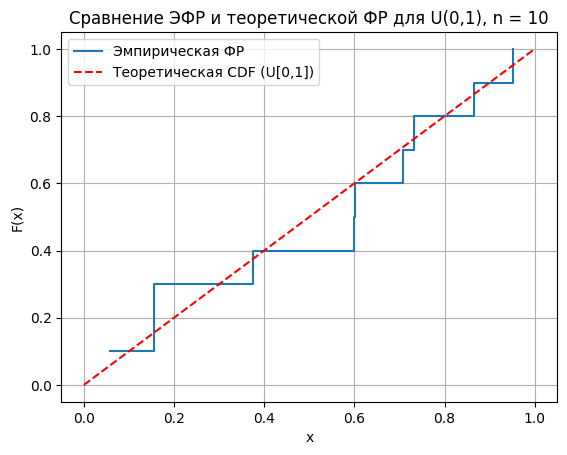

In [15]:
# Сгенерируем выборку на [0, 1]
n = 10
np.random.seed(42)  # для воспроизводимости
sample = np.random.uniform(0, 1, n)

# 2. Построим эмпирическую функцию распределения
sample_sorted = np.sort(sample)
# Значения ЭФР: на 1-й точке - 1/n, на 2-й - 2/n, ..., на n-й - n/n
ecdf = np.arange(1, n+1) / n

# 3. Теоретическая CDF для U(0,1): F(x) = x для x от 0 до 1
x_theor = np.linspace(0, 1, 100)
cdf_theor = x_theor

# 4. График
plt.step(sample_sorted, ecdf, where='post', label='Эмпирическая ФР')
plt.plot(x_theor, cdf_theor, 'r--', label='Теоретическая CDF (U[0,1])')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(-0.05, 1.05)
plt.title(f'Сравнение ЭФР и теоретической ФР для U(0,1), n = {n}')
plt.legend()
plt.grid(True)
plt.show()

## 3.4 Критерий Колмогорова-Смирнова 

Критерий Колмогорова-Смирнова — это непараметрический статистический тест для проверки того, что наблюдаемая выборка могла произойти из заданного (известного) распределения.

Гипотезы:
   - $H_0$: Выборка получена из $F(x)$.
   - $H_1$: Выборка получена не из $F(x)$.

1. Эмпирическая функция распределения (ЭФР):  
   Для вашей выборки размера $n$ определяем эмпирическую функцию распределения $F_n(x)$ 

2. Теоретическая функция распределения:  
   Пусть это $F(x)$ — CDF известного распределения, с которым вы сравниваете.

3. Вычисляем статистику Колмогорова:  
   Основная идея — посмотреть максимально возможное абсолютное расхождение между ЭФР и теоретической ФР:
   $
   D_n = \sup_x |F_n(x) - F(x)|
   $
   (sup — наибольшее значение по всем x). Это максимальная вертикальная "щель" между функциями на графике.


### Как распределена эта статистика $D_n$?

- При верной нулевой гипотезе (то есть если распределение выборки действительно $F(x)$), распределение $D_n$ (называемое _распределением Колмогорова_) *не зависит от самого распределения $F(x)$*, если оно непрерывно.
- В пределе (при $n \to \infty$) распределение $\sqrt{n} D_n$ сходится к так называемому _распределению Колмогорова_, чья функция распределения:
  
  $
  P(\sqrt{n} D_n \leq \lambda ) = 1 - 2\sum_{k=1}^{\infty} (-1)^{k-1} e^{-2k^2 \lambda^2}
  $
  
  Это абстрактное распределение, не являющееся нормальным или каким-либо "известным" в явном виде, но его значения давно табулированы (есть таблицы, апроксимации и реализовано в статистических библиотеках).

- Для малых $n$ значения $D_n$ сопоставляются с табличными критическими значениями, полученными методом Монте-Карло или напрямую подсчитанными.

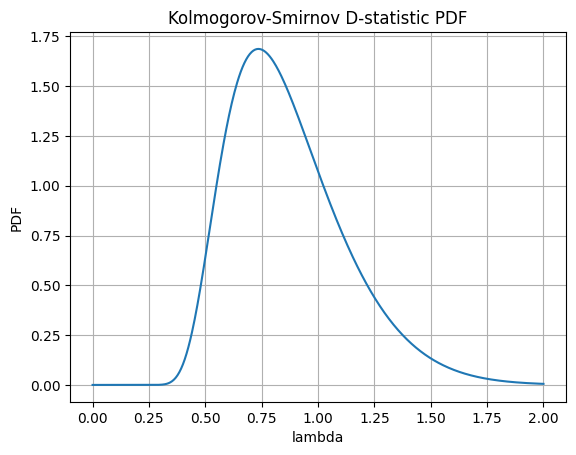

In [17]:
def ks_pdf(lam, kmax=1000):
    res = np.zeros_like(lam)
    for k in range(1, kmax+1):
        res += 8*lam*(-1)**(k-1) * k**2 * np.exp(-2 * k**2 * lam**2)
    return res

lam = np.linspace(0, 2, 500)
pdf = ks_pdf(lam, kmax=1000)

plt.plot(lam, pdf)
plt.title('Kolmogorov-Smirnov D-statistic PDF')
plt.xlabel('lambda')
plt.ylabel('PDF')
plt.grid()
plt.show()

In [18]:

# 1. Ваша выборка
sample = np.random.uniform(0, 1, 50)

# 2. Колмогоров-Смирнов тест против равномерного на [0,1]
# 'cdf' - cumulative distribution function. Для U(0, 1) это просто 'uniform'
ks_statistic, p_value = stats.kstest(sample, 'uniform', args=(0, 1))

print(f"KS-statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Интерпретация:
alpha = 0.05
if p_value < alpha:
    print("Гипотеза H0 отвергается: выборка НЕ из равномерного U(0,1)")
else:
    print("Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)")

KS-statistic: 0.1347
P-value: 0.2974
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


## 3.5 Синтетический АА тест 

Синтетический АА-тест — это специальный тип эксперимента, который симулирует данные теста и контроля без эффекта. А потом проверяет ответ статистического критерия. 

МЫ ЗНАЕМ, что в синтетическом АА-тесте **нет эффекта**. 

План
- выбрать синтетическую модель данных 
- Сгенерировать нужный нам объем выборки для теста и контроля (без эффекта)
- Прогнать статистический критерий
- Повторить 10000 раз

## 3.6 Синтетический АА тест - серия испытаний Бернулли

### Почему каждый синтетический АА тест — испытание Бернулли?

В каждом отдельно взятом синтетическом АА-тесте результат: 
- либо отклоняем $H_0$ - ошибка I рода, "анти-успех" для Бернулли
- либо не отклоняем $H_0$ — "анти-неуспех" для Бернулли.


Рассмотрим серию из $n$ независимых испытаний Бернулли с вероятностью успеха $p$ в каждом.

Например, запускаем синтетический АА тест $n$ раз
- что нам отвечает критерий? 
- как оценить вероятность "успеха" по данным.

Пусть $X_1, X_2, ..., X_n$ — исходы испытаний ($X_i = 1$ — успех (ошибка I рода), $X_i = 0$ — неудача).

Среднее:
$$
\hat p = \bar{X} = \dfrac{1}{n} \sum_{i=1}^M X_i
$$

- $E[\hat{p}] = p$
- $Var(\hat{p}) = \dfrac{p(1-p)}{n}$


По центральной предельной теореме, $\hat{p}$ приближается к нормальному распределению:
$$
\hat{p} \approx \mathcal{N} \left(p,\, \dfrac{p(1-p)}{n}\right) \quad\text{при больших}\ n
$$

Заметим, что для одной случайной величины оценка дисперсии будет: 

$\hat p (1 - \hat p) = \dfrac{1}{n} \sum \limits_i (X_i - \bar X)^2$

$$
\dfrac{\hat{p} - p}{\sqrt{\dfrac{\hat p (1 - \hat p)}{n}}} = \dfrac{\hat{p} - p}{\hat \sigma} \approx \mathcal{N}\left(0,1\right) \quad\text{при больших}\ n
$$

## 3.7 Доверительный интервал для ошибки I рода

Доверительный интервал (или Confidence Interval, CI) — это диапазон значений, который с определённой вероятностью (уровнем доверия) содержит неизвестный параметр генеральной совокупности, например, среднее или долю.

$$z_{\alpha/2}\le \dfrac{\hat{p} - p}{\hat \sigma} \le z_{1-\alpha/2}$$

$$
p \in \hat{p} \pm z_{1 - \alpha/2}\sqrt{\dfrac{\hat{p} (1 - \hat{p})}{n}}
$$

Важно помнить: Доверительный интервал не говорит, что с вероятностью 95% параметр "находится внутри интервала". Он говорит, что процедура построения интервала (при многократном повторении) даёт правильный результат в 95% случаев.


## 3.8 Для проверки валидности критерия

- провести много синтетических АА тестов
- pvalue должно быть распределено равномерно, это можно будет проверить визуально с помощью гистограммы (эмпирическая плотность), QQ-plot, ЭФР, Критерий Колмагорова-Смирнова
- мы можем построить доверительный интервал для ошибки I рода, чтобы убедиться, что критерий работает согласно заданному уровню значимости 

## 4.1 Практический пример. Агрегация данных 

### Сырые логи и единица наблюдения

<img src="pictures/raw_logs.png" width="400">



1. Наблюдение = событие (<span style="color: red;">плохо:</span>  есть зависимость в данных)

2. Наблюдения = как-то агрегированные события


> **Поюзерная агрегация** - агрегация (типа сумма) до пользователя, то есть один пользователь - одно наблюдение

$$\sum_{e \in E_t} X(e) = \sum\limits_{u \in U_t} X(u)$$

<img src="pictures/sum.png" width="300">

$E_t$ - это множество событий в тестовой группе.

$U_t$ - это множество пользователей в тестовой группе.

$X(e), X(u)$ - это значение метрики по событию или по пользователю соответственно. 

Оценка для value метрики будет среднее
$$\sum_{e \in E_t} X(e) = \sum\limits_{u \in U_t} X(u) \rightarrow \dfrac{\sum\limits_{u \in U_t} X(u)}{n} = \overline X_t$$


🔥 Вопрос на собеседовании. Почему нельзя просто взять сырые данные и анализировать их как есть, например, если мы хотим сравнить средний чек в тестовой группе и в контрольной? 
    
## 4.2 Проверим на симуляциях
    
Зафиксируем $n$ — количество пользователей в тестовой и контрольной группах. Для каждого пользователя $i$ мы сгенерируем данные в три этапа.

Этап 1: Определим количество событий $k_i$ с помощью распределения Пуассона со средним 3. Предположим, что получилось $k_i = 3$.

Этап 2: Сгенерируем вектор длины $k_i$ с одинаковым значением метрики из экспоненциального распределения. В этом примере предположим, что сгенерированное значение равно 400, поэтому вектор будет (400, 400, 400).

Этап 3: Применим к каждому значению вектора случайный коэффициент шума, выбирая его из списка [0.8, 0.9, 1, 1.1, 1.2]. В данном примере коэффициенты шума — 1.1, 0.8 и 0.9. Соответственно, итоговый вектор будет (440, 320, 360).    

In [19]:
def group_sample_gen(mu_exp=500, mu_pois=3, n=1000):
    noise_factors = [0.8, 0.9, 1, 1.1, 1.2]
    test_event = []
    control_event = []
    test_user = []
    control_user = []
    for i in range(n):
        k_test = np.random.poisson(lam=mu_pois)
        noise_test = [random.choice(noise_factors) for _ in range(k_test)]
        test_temp = [np.random.exponential(mu_exp)] * k_test
        test_event = test_event + [a * b for a, b in zip(noise_test, test_temp)]
        test_user = test_user + [sum([a * b for a, b in zip(noise_test, test_temp)])]
        k_control = np.random.poisson(lam=mu_pois)
        noise_control = [random.choice(noise_factors) for _ in range(k_control)]
        control_temp = [np.random.exponential(mu_exp)] * k_control
        control_event = control_event + [a * b for a, b in zip(noise_control, control_temp)]
        control_user = control_user + [sum([a * b for a, b in zip(noise_control, control_temp)])]
    return test_event, control_event, test_user, control_user 

In [21]:
#Вычислить p-value 1 000 раз для данных без агрегации (p_value_event) и для данных с агрегацией по пользователям (p_value_user).

pvalue_tt_event = []
pvalue_tt_user = []
for i in tqdm(range(1000)):
    test_event, control_event, test_user, control_user  = group_sample_gen()
    _, p_value_event = stats.ttest_ind(test_event, control_event, equal_var=False)
    _, p_value_user = stats.ttest_ind(test_user, control_user, equal_var=False)
    pvalue_tt_event.append(p_value_event)
    pvalue_tt_user.append(p_value_user)

100%|██████████| 1000/1000 [00:30<00:00, 33.20it/s]


## 4.3 Доверительный интервал для $\alpha$ и равномерность p-value

$$z_{\alpha/2}\le \dfrac{\hat{p} - p}{\hat \sigma} \le z_{1-\alpha/2}$$

$$
\hat{p} - z_{1 - \alpha/2}\cdot \hat \sigma \le p \le \hat{p} + z_{1 - \alpha/2}\cdot \hat \sigma
$$

In [22]:
#Эта функция вычисляет доверительный интервал для доли успехов в серии испытаний Бернулли.

def proportion_ci(pvalue_vector, alpha=0.05):
    pvalue_vector = np.asarray(pvalue_vector).flatten()
    n = len(pvalue_vector)
    count = np.sum(pvalue_vector < alpha)
    p = count / n
    left_bound = p - np.sqrt(p * (1 - p) / n) * stats.norm.ppf(1-alpha/2)
    right_bound = p + np.sqrt(p * (1 - p) / n) * stats.norm.ppf(1-alpha/2)
    return p, left_bound, right_bound

In [23]:
def plot_comparison_with_uniform(p_value_vector, title, color='skyblue'):
    # Предполагаем, что функция proportion_ci определена отдельно
    p, left_boundary, right_boundary = proportion_ci(p_value_vector)
    print(f"Ошибка I рода: {round(p, 4)},\nCI для oшибки I рода: [{round(left_boundary, 4)}, {round(right_boundary, 4)}]")

    fig1, ax1 = plt.subplots(1, 3, figsize=(17, 5))
    
    # --- 1. Гистограмма P-value ---
    ax1[0].hist(p_value_vector, bins=30, edgecolor='black', alpha=0.7, color=color)
    ax1[0].set_title(
        f'Ошибка I рода: {round(np.sum(np.array(p_value_vector) < 0.05) / len(p_value_vector), 3)}'
    )
    ax1[0].set_xlabel('P-value')
    ax1[0].set_ylabel('Частота')
    
    # --- 2. QQ-график ---
    stats.probplot(p_value_vector, dist=stats.uniform, plot=ax1[1])
    ax1[1].get_lines()[1].set_linestyle('--')
    ax1[1].set_title(f'{title} (QQ-график)')
    
    # --- 3. Эмпирическая функция распределения ---
    pvals_sorted = np.sort(p_value_vector)
    n = len(pvals_sorted)
    ecdf = np.arange(1, n+1) / n

    x_uniform = np.linspace(0, 1, 200)
    cdf_uniform = x_uniform

    ax1[2].step(pvals_sorted, ecdf, where='post', label='Эмпирическая ФР', color=color)
    ax1[2].plot(x_uniform, cdf_uniform, 'k--', label='Теоретическая CDF $U[0,1]$')
    
    # --- Тест Колмогорова-Смирнова ---
    ks_statistic, ks_p_value = stats.kstest(p_value_vector, 'uniform', args=(0, 1))
    print(f'Статистика Колмагорова-Смирнова: {round(ks_statistic, 4)}, pvalue для сравнения ЭФР с равномерным: {round(ks_p_value, 4)}')
    if ks_p_value < 0.05:
        print("Гипотеза H0 отвергается: выборка НЕ из равномерного U(0,1)")
    else:
        print("Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)")
    
    ax1[2].set_title('Эмпирическая и теоретическая ФР')
    ax1[2].set_xlabel('p-value')
    ax1[2].set_ylabel('F(p-value)')
    ax1[2].legend(loc="lower right")
    ax1[2].text(
        0.05, 0.9,
        f"KS: stat={ks_statistic:.3f}\np={ks_p_value:.3f}",
        transform=ax1[2].transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle="round", fc="w", alpha=0.5)
    )

    plt.tight_layout()
    plt.show()

Ошибка I рода: 0.296,
CI для oшибки I рода: [0.2677, 0.3243]
Статистика Колмагорова-Смирнова: 0.3094, pvalue для сравнения ЭФР с равномерным: 0.0
Гипотеза H0 отвергается: выборка НЕ из равномерного U(0,1)


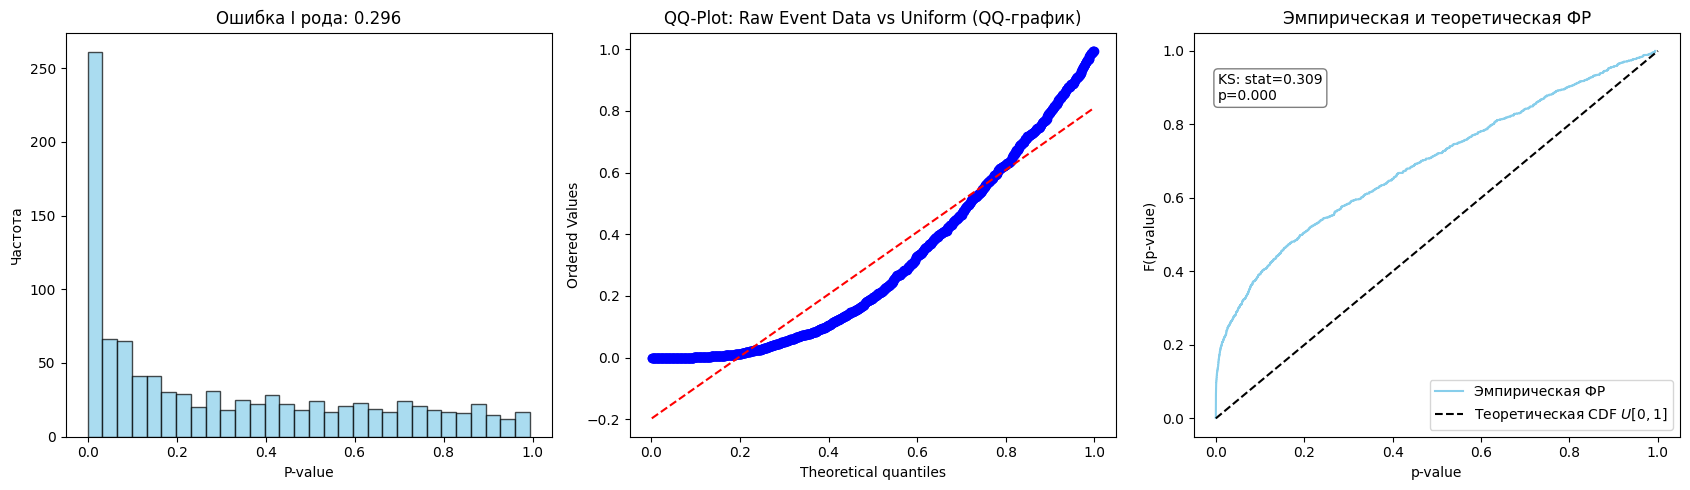

In [24]:
p_value_vector = pvalue_tt_event
plot_comparison_with_uniform(p_value_vector, 'QQ-Plot: Raw Event Data vs Uniform')

Ошибка I рода: 0.049,
CI для oшибки I рода: [0.0356, 0.0624]
Статистика Колмагорова-Смирнова: 0.0278, pvalue для сравнения ЭФР с равномерным: 0.4132
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


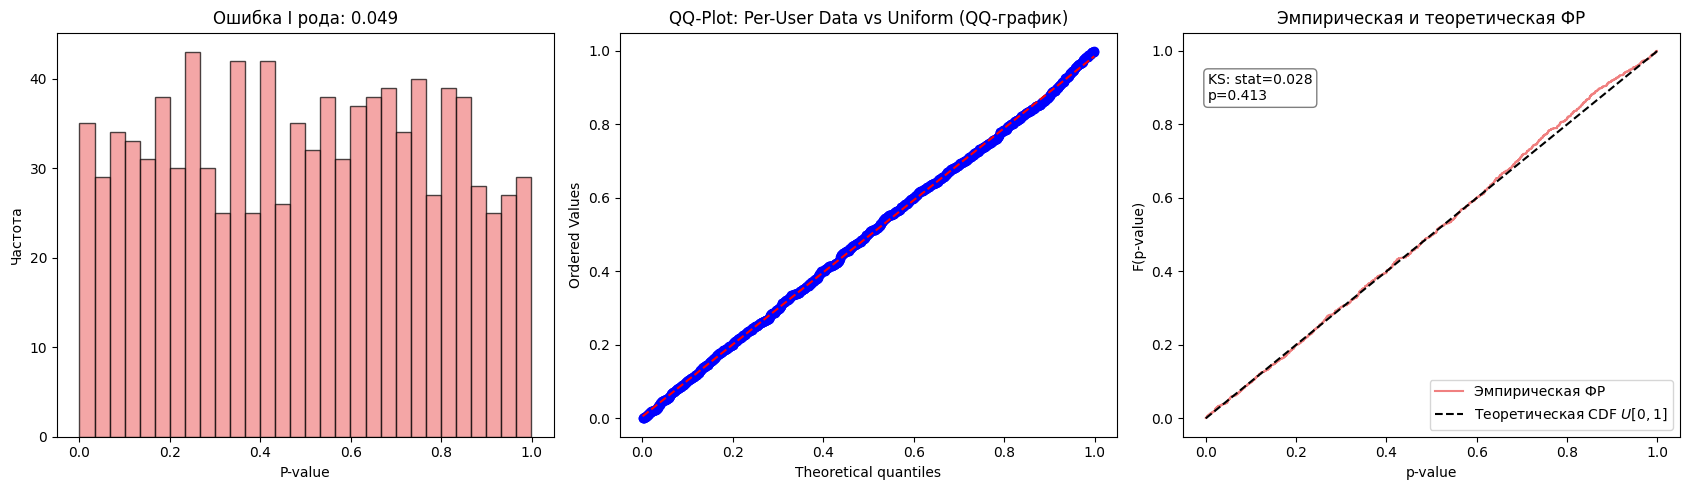

In [25]:
p_value_vector = pvalue_tt_user
plot_comparison_with_uniform(p_value_vector, 'QQ-Plot: Per-User Data vs Uniform', 'lightcoral')

## 4.4 Обобщение Колмагорова-Смирнова

Синтетические АА-тесты - откуда брать модель для симуляции? 

А если нам не известны параметры распределения? 

### Давайте попробуем оценить параметры по той же выборке

In [26]:
pvalue_vector = []
for i in tqdm(range(1000)):
    sample = stats.norm(loc=0, scale=1).rvs(1000)
    mu = np.mean(sample)
    sigma = np.std(sample, ddof=1)
    ks_statistic, p_value = stats.kstest(sample, 'norm', args=(mu, sigma))
    pvalue_vector.append(p_value)

100%|██████████| 1000/1000 [00:01<00:00, 629.61it/s]


Ошибка I рода: 0.0,
CI для oшибки I рода: [0.0, 0.0]
Статистика Колмагорова-Смирнова: 0.4203, pvalue для сравнения ЭФР с равномерным: 0.0
Гипотеза H0 отвергается: выборка НЕ из равномерного U(0,1)


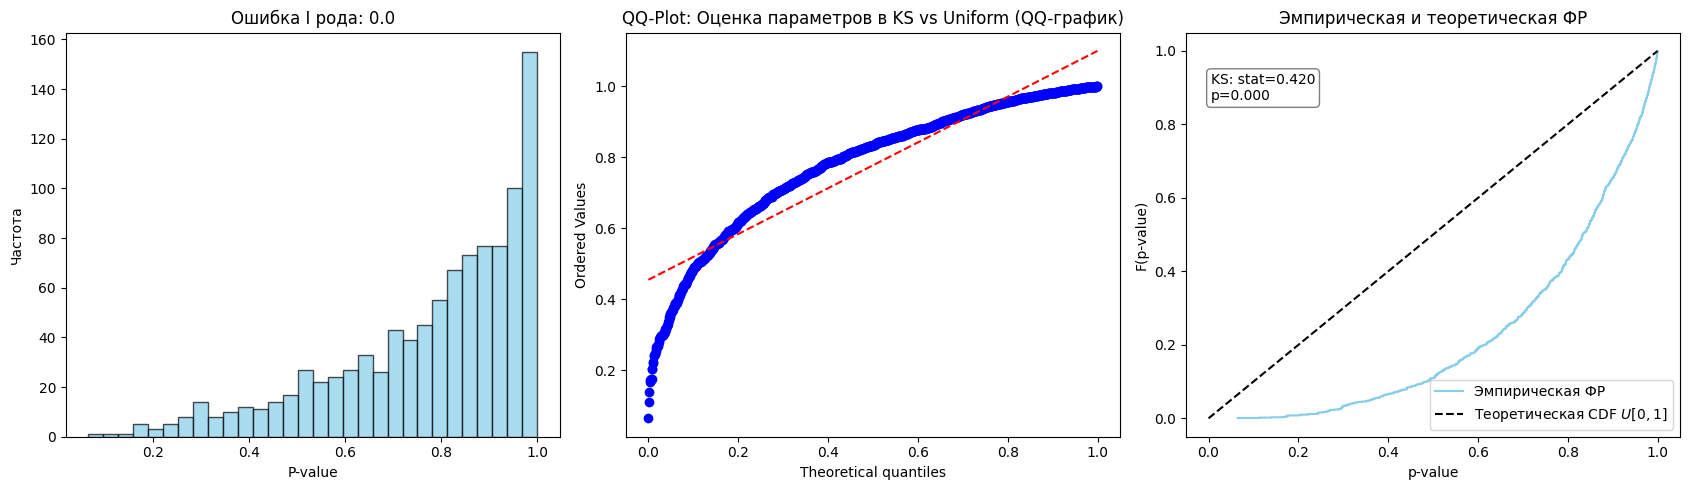

In [27]:
plot_comparison_with_uniform(pvalue_vector, 'QQ-Plot: Оценка параметров в KS vs Uniform')

### Давайте оценим эмпирическое распределение D для данных параметров 

In [28]:
data = stats.norm(loc=0, scale=1).rvs(1000)
# 1. Оценим параметры
mu, sigma = np.mean(data), np.std(data, ddof=1)

# 2. Статистика K-S для ваших данных
statistic, _ = stats.kstest(data, 'norm', args=(mu, sigma))

emp_stats = []
for i in range(500):
    sample = stats.norm(loc=0, scale=1).rvs(1000)
    mu_sample, sigma_sample = np.mean(sample), np.std(sample, ddof=1)
    ks_stat, _ = stats.kstest(sample, 'norm', args=(mu_sample, sigma_sample))
    emp_stats.append(ks_stat)

# 3. Эмпирическое p-value
emp_p_value = np.mean(np.array(emp_stats) >= statistic)
print("K-S statistic:", statistic)
print("Cкорректированное p-value:", emp_p_value)

K-S statistic: 0.017784789895289532
Cкорректированное p-value: 0.628


In [29]:
pvalue_vector_сorrected = []
for i in tqdm(range(500)):
    data = stats.norm(loc=0, scale=1).rvs(1000)
    mu, sigma = np.mean(data), np.std(data, ddof=1)
    statistic, _ = stats.kstest(data, 'norm', args=(mu, sigma))
    emp_stats = []
    for i in range(1000):
        sample = stats.norm(loc=mu, scale=sigma).rvs(1000)
        mu_sample, sigma_sample = np.mean(sample), np.std(sample, ddof=1)
        ks_stat, _ = stats.kstest(sample, 'norm', args=(mu_sample, sigma_sample))
        emp_stats.append(ks_stat)
    emp_p_value = np.mean(np.array(emp_stats) >= statistic)
    pvalue_vector_сorrected.append(emp_p_value)

100%|██████████| 500/500 [12:53<00:00,  1.55s/it]


Ошибка I рода: 0.04,
CI для oшибки I рода: [0.0228, 0.0572]
Статистика Колмагорова-Смирнова: 0.036, pvalue для сравнения ЭФР с равномерным: 0.5242
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


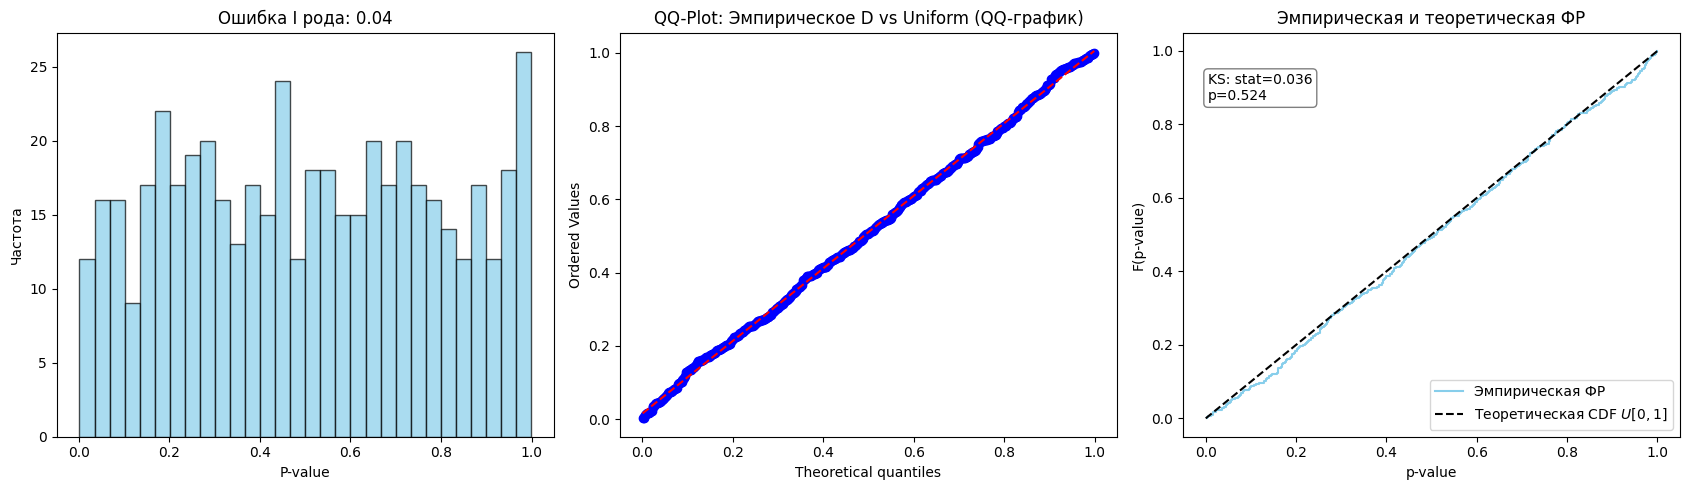

In [30]:
plot_comparison_with_uniform(pvalue_vector_сorrected, 'QQ-Plot: Эмпирическое D vs Uniform')

### Ограничения Колмагорова-Смирнова
- Годится только для непрерывных распределений
- Если параметры распредления неизвестны, то нельзя напрямую использовать оценки 
- Для конкретных оценок параметров надо строить эмпирическую функцию распределения Колмагорова-Смирнова и pvalue оценивать по ней

Для класса нормальных распределений существуют 
- **Лиллифорс-тест** 
- Тест Шапиро–Уилка (**Shapiro–Wilk test**) 

### Математическая идея Лиллифорс-тест

Модификация стандартного KS:
- Распределение статистики D теперь другое: оно учитывает погрешности оценивания $\hat{\mu}$ и $\hat{\sigma}$ (поправки встроены в пакет).

In [31]:
import numpy as np
from statsmodels.stats.diagnostic import lilliefors

data = stats.norm(loc=0, scale=1).rvs(1000)
stat, p = lilliefors(data, dist='norm')  # dist=’norm’ или ‘exp’
print("Статистика Лиллифорса:", stat)
print("p-value (уже с учетом, что параметры неизвестны!):", p)

Статистика Лиллифорса: 0.012790213823153929
p-value (уже с учетом, что параметры неизвестны!): 0.975926191101352


In [32]:
pvalue_vector_lilliefors = []
for i in tqdm(range(1000)):
    data = stats.norm(loc=0, scale=1).rvs(1000)
    lil_stat, lil_p_value = lilliefors(data, dist='norm')
    pvalue_vector_lilliefors.append(lil_p_value)

100%|██████████| 1000/1000 [00:01<00:00, 640.08it/s]


Ошибка I рода: 0.039,
CI для oшибки I рода: [0.027, 0.051]
Статистика Колмагорова-Смирнова: 0.0845, pvalue для сравнения ЭФР с равномерным: 0.0
Гипотеза H0 отвергается: выборка НЕ из равномерного U(0,1)


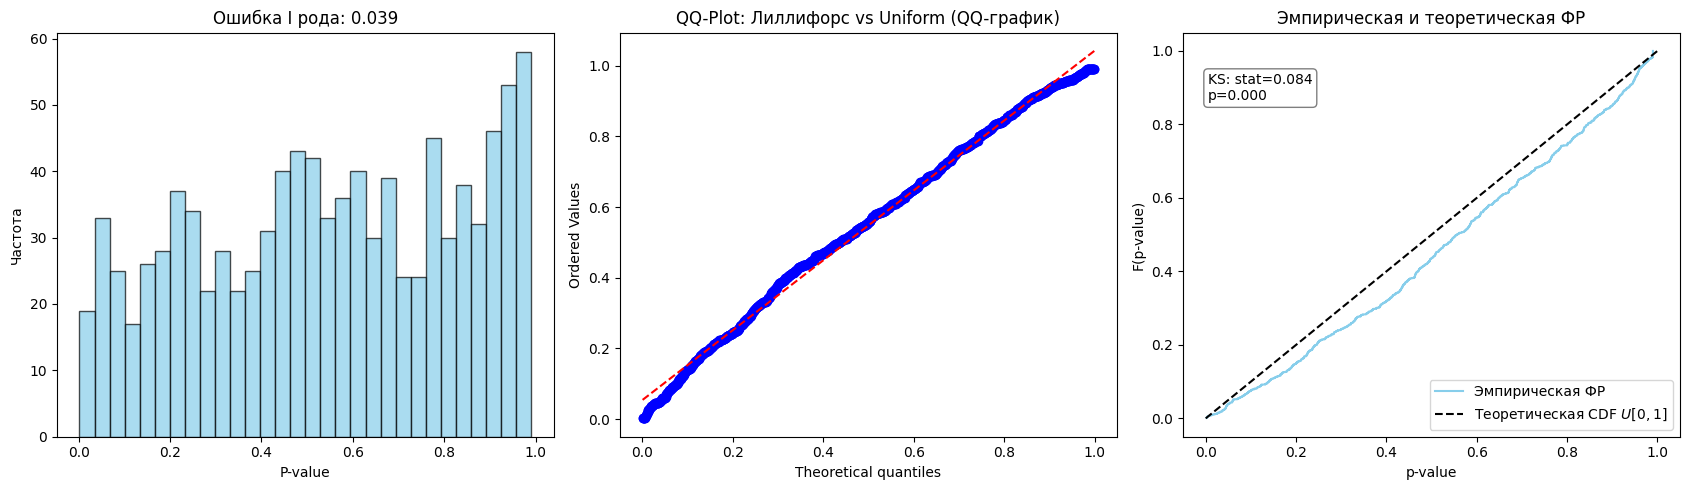

In [33]:
plot_comparison_with_uniform(pvalue_vector_lilliefors, 'QQ-Plot: Лиллифорс vs Uniform')

### Математическая идея Шапиро-Уилка

Пусть ваши данные:  
$$
X_1 \leq X_2 \leq ... \leq X_n
$$


Статистика W формулируется как
$$
W = \dfrac{\left(\sum\limits_{i=1}^n a_i X_{(i)}\right)^2}{\sum\limits_{i=1}^n (X_i - \bar{X})^2}
$$
где $a_i$ — специальные веса, вычисляемые на основе матрицы ковариаций теоретических нормальных порядковых статистик.

Интуиция:
- Если ваши данные идеально нормальны, числитель почти равен знаменателю.
- Если в данных перекос (грубое отличие, тяжелые хвосты, высокая асимметрия, выбросы), числитель будет заметно меньше знаменателя.
- Само W ≈ 1 для нормального распределения, стремится к 0 при сильных отклонениях.

> Тест Шапиро–Уилка сравнивает вашу упорядоченную выборку с тем, как выглядела бы упорядоченная выборка такого же размера из настоящего идеального нормального распределения. Чем сильнее отличие — тем меньше статистика W и ниже p-value.

In [34]:
from scipy.stats import shapiro
import numpy as np

data = stats.norm(loc=0, scale=1).rvs(1000)

# Запуск теста
stat, p = shapiro(data)

print('Статистика W:', stat)
print('p-value:', p)
if p > 0.05:
    print("Нет оснований отвергнуть H₀: данные похожи на нормальные")
else:
    print("Отклоняем H₀: данные не похожи на нормальные")

Статистика W: 0.9982016086578369
p-value: 0.3775637149810791
Нет оснований отвергнуть H₀: данные похожи на нормальные


In [35]:
pvalue_vector_shapiro = []
for i in tqdm(range(1000)):
    data = stats.norm(loc=0, scale=1).rvs(1000)
    shapiro_stat, shapiro_p_value = shapiro(data)
    pvalue_vector_shapiro.append(shapiro_p_value)

100%|██████████| 1000/1000 [00:00<00:00, 1218.99it/s]


Ошибка I рода: 0.043,
CI для oшибки I рода: [0.0304, 0.0556]
Статистика Колмагорова-Смирнова: 0.0366, pvalue для сравнения ЭФР с равномерным: 0.1348
Нет оснований отвергнуть H0: выборка МОГЛА быть из U(0,1)


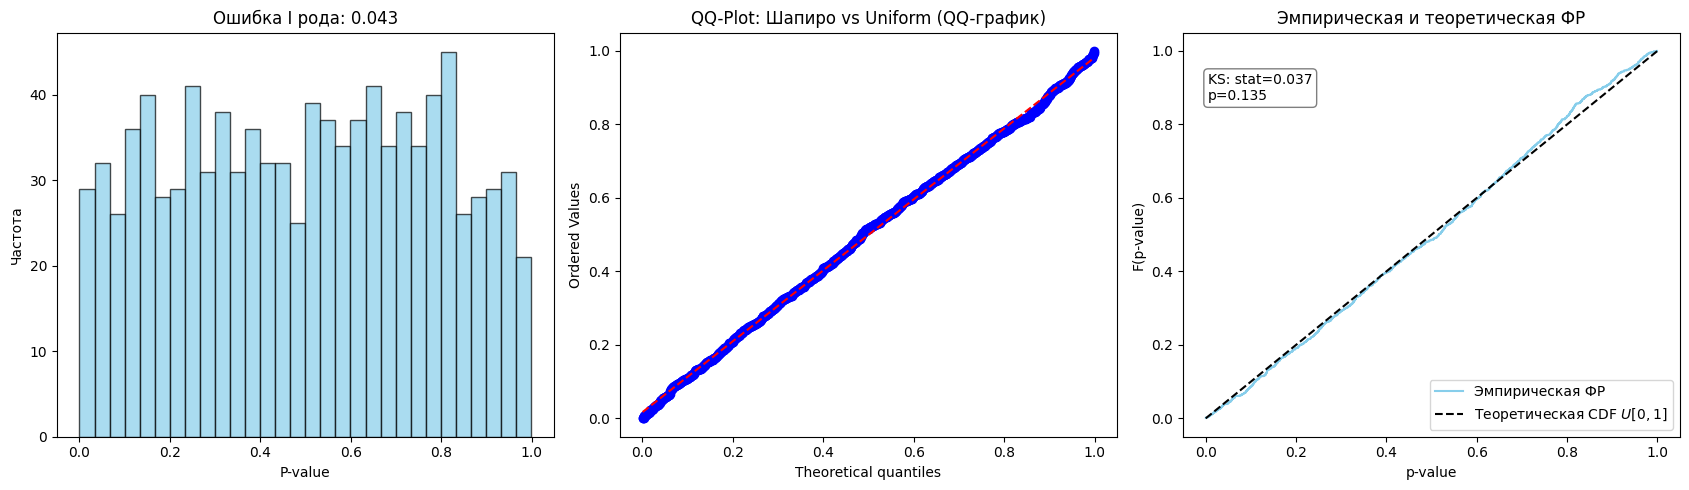

In [36]:
plot_comparison_with_uniform(pvalue_vector_shapiro, 'QQ-Plot: Шапиро vs Uniform')

## 4.5 А что если мы не знаем модель данных?

АА тесты на основе исторических данных:
- Разбить данные на непересекающиеся сегменты, потом каждый сегмент данных разбить на тест и контроль 
- Разбить одни и те же данные случайным образом много раз на тест и контроль

Таблица сравнения

| Критерий                  | Непересекающиеся сегменты  | Много рандомных разбиений      |
|---------------------------|----------------------------|-------------------------------|
| Независимость экспериментов | +                         | —                              |
| Число проверок            | Мало (кол-во сегментов)    | Много (десятки, сотни тысяч)   |
| Имитирует "реальный" A/B  | +                          | —
| Оценка боевой дисперсии   | +                          | —                              |